In [48]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

In [ ]:
import os
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [49]:
def face_detect(imagePath):
    face_detector = cv2.CascadeClassifier('D:/opencv/opencv/sources/data/haarcascades/haarcascade_frontalface_alt2.xml')

    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray,1.12,5)

    print("Found {0} faces!".format(len(faces)))

    for x,y,w,h in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),color=(255,0,0),thickness=2)
        
    im = Image.open(imagePath)

    (x, y, w, h) = faces[0]
    center_x = x+w/2
    center_y = y+h/2
    b_dim = min(max(w,h)*1.2,im.width, im.height) # WARNING : this formula in incorrect
    #box = (x, y, x+w, y+h)
    box = (center_x-b_dim/2, center_y-b_dim/2, center_x+b_dim/2, center_y+b_dim/2)
    # Crop Image
    crpim = im.crop(box).resize((224,224))
    plt.imshow(np.asarray(crpim))
    return crpim

Found 1 faces!
[[[ 52  35  25]
  [ 49  35  26]
  [ 47  34  25]
  ...
  [197 166 145]
  [194 163 142]
  [193 162 141]]

 [[ 48  34  25]
  [ 46  32  23]
  [ 44  31  22]
  ...
  [195 164 143]
  [195 164 143]
  [195 164 143]]

 [[ 46  32  23]
  [ 42  29  20]
  [ 39  29  20]
  ...
  [195 164 143]
  [194 163 142]
  [195 164 143]]

 ...

 [[182 157 135]
  [180 155 133]
  [180 155 133]
  ...
  [  4  17  49]
  [  3  18  51]
  [  2  18  52]]

 [[183 158 136]
  [181 156 134]
  [180 155 133]
  ...
  [  4  17  49]
  [  3  18  51]
  [  1  17  50]]

 [[180 155 133]
  [180 155 133]
  [179 154 132]
  ...
  [  1  14  46]
  [  1  16  49]
  [  0  16  49]]]


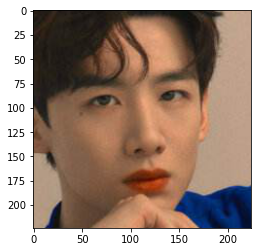

In [50]:
imagePath = 'C:/Users/14177/Desktop/bjt.jpg'

img = face_detect(imagePath)
img = np.asarray(img)
img = np.expand_dims(img,axis=0)
preds = model_final.predict(img)
print(preds)
print(img)

Found 0 profile faces!


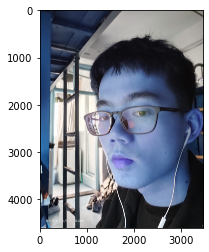

In [26]:
imagePath = 'C:/Users/14177/Desktop/rightface.jpg'

face_detector = cv2.CascadeClassifier('D:/opencv/opencv/sources/data/haarcascades/haarcascade_profileface.xml')

image = cv2.imread(imagePath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
flipped = cv2.flip(gray, 1)
faces = face_detector.detectMultiScale(flipped,1.3,5)

print("Found {0} profile faces!".format(len(faces)))

for x,y,w,h in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),color=(255,0,0),thickness=2)

plt.imshow(image)

Found 0 faces!


-1

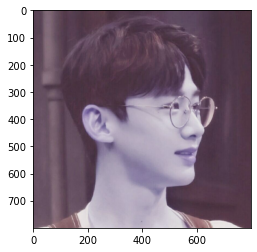

In [18]:
imagePath = 'D:/FaceData/face/baijingting/0c4cf7e7bd0d115dedd7979fd1eb2ac7.jpeg'

face_detector = cv2.CascadeClassifier('D:/opencv/opencv/sources/data/haarcascades/haarcascade_profileface.xml')

image = cv2.imread(imagePath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_detector.detectMultiScale(gray,1.3,5)

print("Found {0} faces!".format(len(faces)))

for x,y,w,h in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),color=(255,0,0),thickness=2)
    
plt.imshow(image)

cv2.waitKey(0)

In [5]:
def cropped_image(imagePath,savePath):
    face_detector = cv2.CascadeClassifier('D:/opencv/opencv/sources/data/haarcascades/haarcascade_frontalface_alt2.xml')

    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray,1.12,5)

    print("Found {0} faces!".format(len(faces)))

    for x,y,w,h in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),color=(255,0,0),thickness=2)
        
    im = Image.open(imagePath)

    (x, y, w, h) = faces[0]
    center_x = x+w/2
    center_y = y+h/2
    b_dim = min(max(w,h)*1.2,im.width, im.height) # WARNING : this formula in incorrect
    #box = (x, y, x+w, y+h)
    box = (center_x-b_dim/2, center_y-b_dim/2, center_x+b_dim/2, center_y+b_dim/2)
    # Crop Image
    crpim = im.crop(box).resize((224,224))
    plt.imshow(np.asarray(crpim))
    crpim.save(savePath)

In [6]:
imagePath = 'D:/FaceData/face/baijingting\0c4cf7e7bd0d115dedd7979fd1eb2ac7.jpeg'
savePath = 'C:/Users/14177/Desktop/vgg_FaceRecognition/face_crop.jpg'
cropped_image(imagePath, savePath)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
